## Example: upload [`pytorch.ipynb`](./pytorch.ipynb) to the `scverse-ml-workshop-2024` TileDB-Cloud namespace.

Requires `.tiledb-cloud-token` to exist, and contain a valid access token ([docs](https://docs.tiledb.com/cloud/how-to/account/create-api-tokens)).

In [1]:
from tiledb import cloud
from tiledb.cloud import client

token = open('.tiledb-cloud-token').read().strip()
cloud.login(token=token)

[Papermill](https://papermill.readthedocs.io/en/latest/) params:

In [2]:
src = 'pytorch.ipynb'                   # local path to notebook to upload
dst = 'pytorch-test.ipynb'              # destination notebook name
delete = False                          # if True, delete the notebook after uploading (verify that upload and delete work as expected)
namespace = 'scverse-ml-workshop-2024'
credential_name = 'rw-test'

{'allowed_actions': ['delete',
                     'edit',
                     'write',
                     'read',
                     'create',
                     'read_array_logs',
                     'edit_monetization',
                     'read_array_info',
                     'read_array_schema',
                     'edit_organization',
                     'read_namespace_logs',
                     'read_job_logs',
                     'run_job',
                     'run_notebook',
                     'read_array_info'],
 'asset_locations': {'arrays': None,
                     'files': None,
                     'groups': None,
                     'ml_models': None,
                     'notebooks': None,
                     'task_graphs': None,
                     'udfs': None},
 'assume_role_arn': None,
 'created_at': datetime.datetime(2024, 8, 22, 17, 8, tzinfo=tzutc()),
 'default_s3_path': 's3://tiledb-rw-us-west-2/scverse',
 'default_s3_path_credentials_na
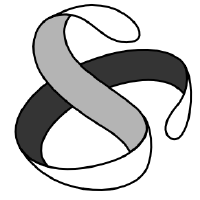

In [3]:
orgs = client.organizations()
[org] = [ org for org in orgs if org.name == namespace ]
org

In [4]:
cloud.upload_notebook_from_file(
    src,
    array_name=dst,
    namespace=namespace,
    storage_credential_name=credential_name,
)

'tiledb://scverse-ml-workshop-2024/pytorch-test.ipynb'

In [5]:
arrs1 = client.list_arrays(namespace=namespace).arrays
print('\n'.join([ arr.name for arr in arrs1 ]))

pytorch-test.ipynb
cshl-rw
pytorch-ryan-williams-tiledb-com
pytorch-rw
pytorch-ml


In [6]:
[arr] = [ arr for arr in arrs1 if arr.name == dst ]
arr

{'access_credentials_name': 'rw-test',
 'allowed_actions': ['edit',
                     'read',
                     'read_array_info',
                     'read_array_logs',
                     'read_array_schema',
                     'write'],
 'created_at': datetime.datetime(2024, 8, 30, 15, 21, 22, tzinfo=tzutc()),
 'description': None,
 'file_properties': None,
 'file_type': 'notebook',
 'id': '6794276b-10df-441f-a90c-a26339acc0d1',
 'is_favorite': None,
 'last_accessed': datetime.datetime(2024, 8, 30, 15, 21, 26, tzinfo=tzutc()),
 'license_id': None,
 'license_text': None,
 'logo': None,
 'name': 'pytorch-test.ipynb',
 'namespace': 'scverse-ml-workshop-2024',
 'namespace_subscribed': None,
 'pricing': None,
 'public_share': False,
 'read_only': False,
 'share_count': None,
 'size': 19942.0,
 'subscriptions': None,
 'tags': None,
 'tiledb_uri': 'tiledb://scverse-ml-workshop-2024/6794276b-10df-441f-a90c-a26339acc0d1',
 'type': 'dense',
 'uri': 's3://tiledb-rw/pytorch-test.ipynb

In [7]:
if delete:
    cloud.array.delete_array(arr.tiledb_uri)
    arrs2 = client.list_arrays(namespace=namespace).arrays
    print('\n'.join([ arr.name for arr in arrs2 ]))